# Análisis exploratorio de datos
En este informe, se realizará una exploración exhaustiva de los conjuntos de datos relacionados con los `hechos` y las `víctimas`. El objetivo principal es comprender la estructura de estos datos, identificar posibles patrones y recopilar información relevante que sirva como base para la creación del panel de control en Power BI.

### Importación de librerías necesarias

In [60]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import googlemaps
from datetime import datetime
import seaborn as sns
from matplotlib.ticker import FixedLocator

# EDA DataFrame `homicidios_hechos_victimas`

In [61]:
# Carga del archivo
df_hhv = pd.read_csv('../datasets/homicidios_hechos_victimas.csv')

### 1. Visualizamos la Estructura del DataFrame
Visualizamos las primeras filas del DataFrame

In [62]:
df_hhv.head()

,id_hecho,n_victimas,fecha,franja_hora,tipo_calle,comuna,pos_x,pos_y,participantes,acusado,gravedad,rol,vehiculo_victima,sexo_victima,edad_victima,RANGO_ETARIO
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-58.475340,-34.687570,moto-auto,auto,fatal,conductor,moto,masculino,19.0,2_ 18 a 29 años
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-58.508775,-34.669777,auto-pasajeros,pasajeros,fatal,conductor,auto,masculino,70.0,6_ 60 años o más
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-58.390403,-34.631894,moto-auto,auto,fatal,conductor,moto,masculino,30.0,3_ 30 a 39 años
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-58.465039,-34.680930,moto-sd,NaN,fatal,conductor,moto,masculino,18.0,2_ 18 a 29 años
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-58.387183,-34.622466,moto-pasajeros,pasajeros,fatal,conductor,moto,masculino,29.0,2_ 18 a 29 años


Cambiamos tipos de datos a las columnas `franja_hora`, `comuna`, `edad_victima`

In [63]:
df_hhv['franja_hora'] = df_hhv['franja_hora'].astype('Int64')
df_hhv['comuna'] = df_hhv['comuna'].astype('Int64')
df_hhv['edad_victima'] = df_hhv['edad_victima'].astype('Int64')

In [ ]:
# Configuramos la columna `comuna` para poder analizarla en un gráfico
df_hhv['comuna'] = pd.to_numeric(df_hhv['comuna'], errors='coerce').fillna(-1)

## Análisis `Homicidios` por **Edad**

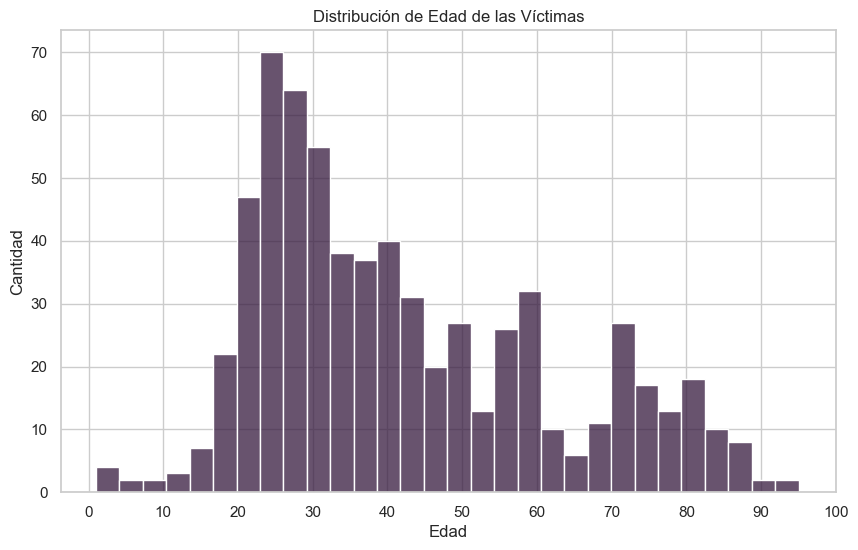

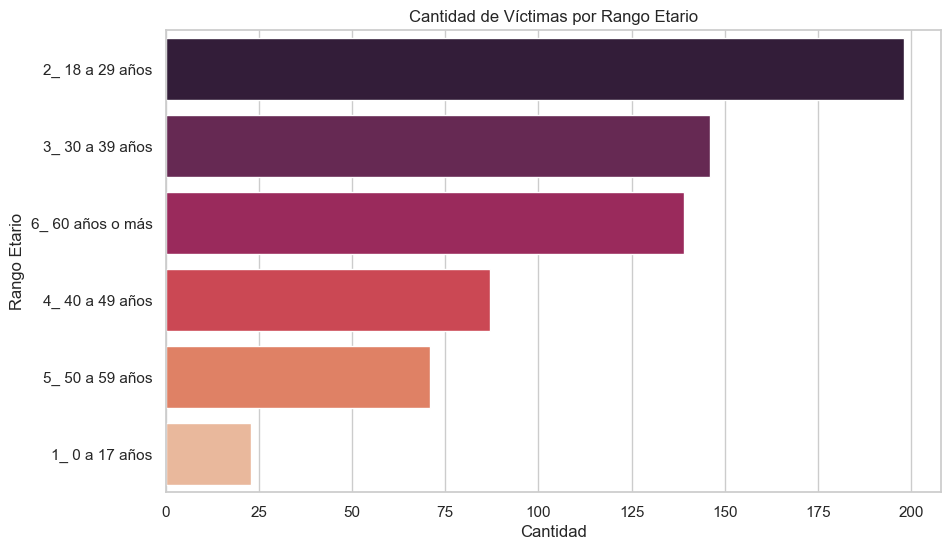

In [94]:
# Establecer el estilo de seaborn y la paleta de colores
sns.set(style="whitegrid", palette='rocket')

# Histograma para 'edad_victima'
plt.figure(figsize=(10, 6))
sns.histplot(df_hhv['edad_victima'].dropna(), bins=30, kde=False)
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.xticks(range(0, int(df_hhv['edad_victima'].max()) + 10, 10))
plt.show()

# Diagrama de barras para 'RANGO_ETARIO'
plt.figure(figsize=(10, 6))
rango_etario_order = df_hhv['RANGO_ETARIO'].value_counts().index
sns.countplot(data=df_hhv, y='RANGO_ETARIO', order=rango_etario_order, palette='rocket')
plt.title('Cantidad de Víctimas por Rango Etario')
plt.xlabel('Cantidad')
plt.ylabel('Rango Etario')
plt.show()

### **Conclusión**
- El diagrama de barras muestra la distribución de las víctimas según diferentes **``rangos etarios``**. Se observa que el **``rangos etarios``** con la mayor cantidad de víctimas se encuentra en la categoría de **"18 a 29 años"**, seguido por el rango etario **"30 a 39 años"**, luego le siguen otros grupos de edad. Esta información sugiere que la población más joven tiene una representación significativa en los incidentes viales registrados, lo que puede indicar áreas de enfoque para medidas de prevención y seguridad vial dirigidas a este grupo demográfico.

## Análisis `Homicidios` por **Comuna**

#### Visualizamos la distribución de `Homicidios` totales entre todas las comunas

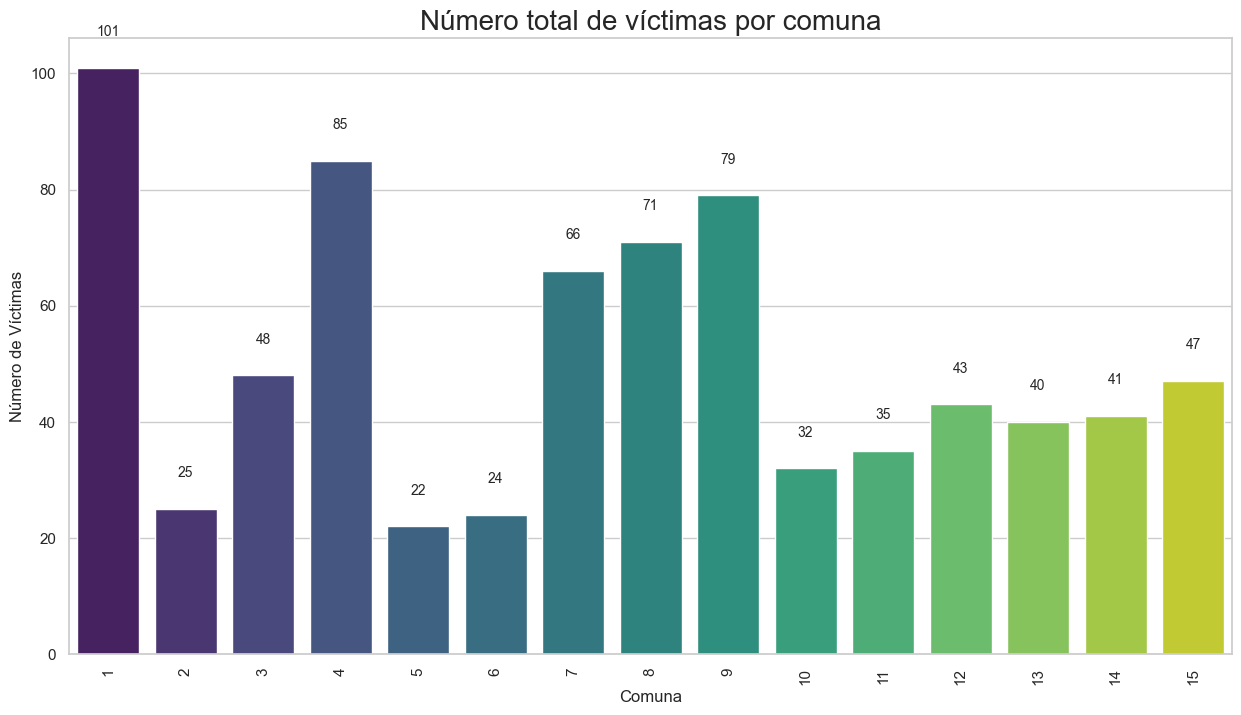

In [144]:
df_filtered = df_hhv[df_hhv['comuna'] != -1]
plt.figure(figsize=(15, 8))
sns.barplot(x='comuna', y='n_victimas', data=df_filtered, estimator=sum, ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.title('Número total de víctimas por comuna',fontsize=20)
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')

# Añadir el número de víctimas a cada barra
for i, v in enumerate(df_filtered.groupby('comuna')['n_victimas'].sum()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

### **Conclusión**
- En el gráfico "Número total de víctimas por comuna", se observa una variación marcada en la cantidad de víctimas de accidentes de tránsito entre las distintas comunas. Por ejemplo, la **``Comuna 1``** presenta el mayor número de víctimas, con un total de **101** casos, mientras que la **``Comuna 5``** y la **``Comuna 10``** registran **22** y **32** víctimas, respectivamente. Esta discrepancia sugiere que la **``Comuna 1``** podría beneficiarse de intervenciones específicas para mejorar la seguridad vial y reducir el número de accidentes, como campañas de concientización, mejoras en la señalización o medidas de control de velocidad.

#### Mapa de calor de Incidentes por ``Comuna`` y ``Franja Horaria``

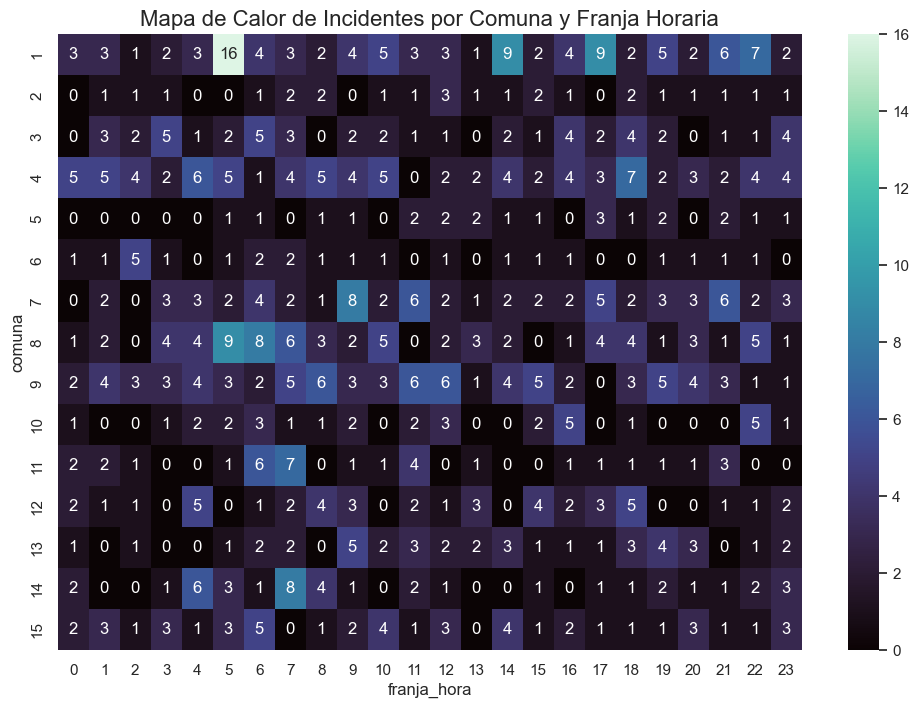

In [148]:
df_filtered = df_hhv[df_hhv['comuna'] != -1]
pivot_table = df_filtered.pivot_table(index='comuna', columns='franja_hora', values='n_victimas', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="mako")
plt.title("Mapa de Calor de Incidentes por Comuna y Franja Horaria",fontsize=16)
plt.show()

### **Conclusiones**

- Patrones Horarios: Observamos que hay franjas horarias específicas con una mayor concentración de incidentes en varias comunas. Por ejemplo, en la Franja Horaria 5, la Comuna 1 muestra un aumento significativo en incidentes en comparación con otras franjas horarias y comunas.

- Comunas con Mayor Incidencia: Algunas comunas, como la Comuna 4, Comuna 8 y Comuno 9, presentan una alta concentración de incidentes a lo largo del día en varias franjas horarias, lo que podría indicar áreas con desafíos particulares en términos de seguridad vial.

- Franjas Horarias Críticas: Se pueden identificar franjas horarias críticas con una alta incidencia de incidentes en múltiples comunas. Por ejemplo, las Franjas Horarias 5, 6 y 7 muestran números notables de incidentes en varias comunas.

#### Distribución del número ``Total`` de ``Víctimas por Sexo en Cada Comuna``

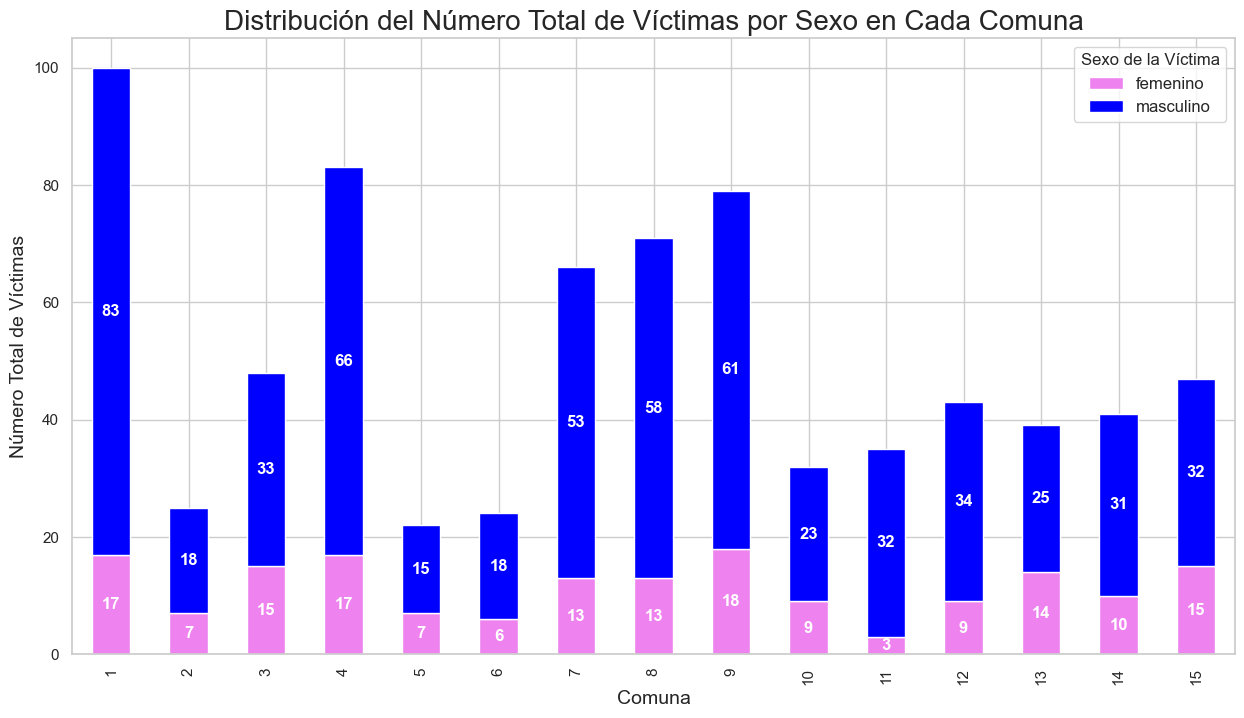

In [177]:
count_sex_comuna = df_hhv.groupby(['comuna', 'sexo_victima'])['n_victimas'].sum().unstack(fill_value=0)

sns.set(style="whitegrid")
plt.rcParams['font.size'] = 12

colors = {'masculino': 'blue', 'femenino': 'violet'}
ax = count_sex_comuna.plot(kind='bar', stacked=True, figsize=(15, 8), color=[colors[col] for col in count_sex_comuna.columns])

plt.title('Distribución del Número Total de Víctimas por Sexo en Cada Comuna', fontsize=20)
plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Número Total de Víctimas', fontsize=14)
plt.legend(title='Sexo de la Víctima', fontsize=12)

for n, bar in enumerate(ax.patches):

    x = bar.get_x()
    y = bar.get_y()
    height = bar.get_height()
    
    if height > 0:
        plt.text(x + bar.get_width() / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontweight='bold', color='white')

plt.show()

### **Conclusiones**
- Desigualdad de género en las víctimas: Hay una notable diferencia entre el número de víctimas masculinas y femeninas en todas las comunas, con un predominio significativo de víctimas masculinas. Esto podría indicar una tendencia de mayor exposición o riesgo en hombres en comparación con mujeres en lo que respecta a accidentes de tránsito o siniestros viales.

- Comunas con mayor número de víctimas: La Comuna 1 presenta el número más alto de víctimas totales, seguida de las Comunas 9 y 8. Estos datos podrían sugerir que estas comunas tienen puntos de alta peligrosidad o mayor tráfico, lo que incrementa el riesgo de incidentes.

- Consistencia en la distribución: La consistencia en la distribución del número de víctimas por sexo en las comunas sugiere que el riesgo de ser víctima no depende de la localización geográfica dentro de la ciudad, sino más bien de factores relacionados con el género.

#### Distribución del número ``Total de Víctimas`` por ``tipo_calle`` en cada ``Comuna``

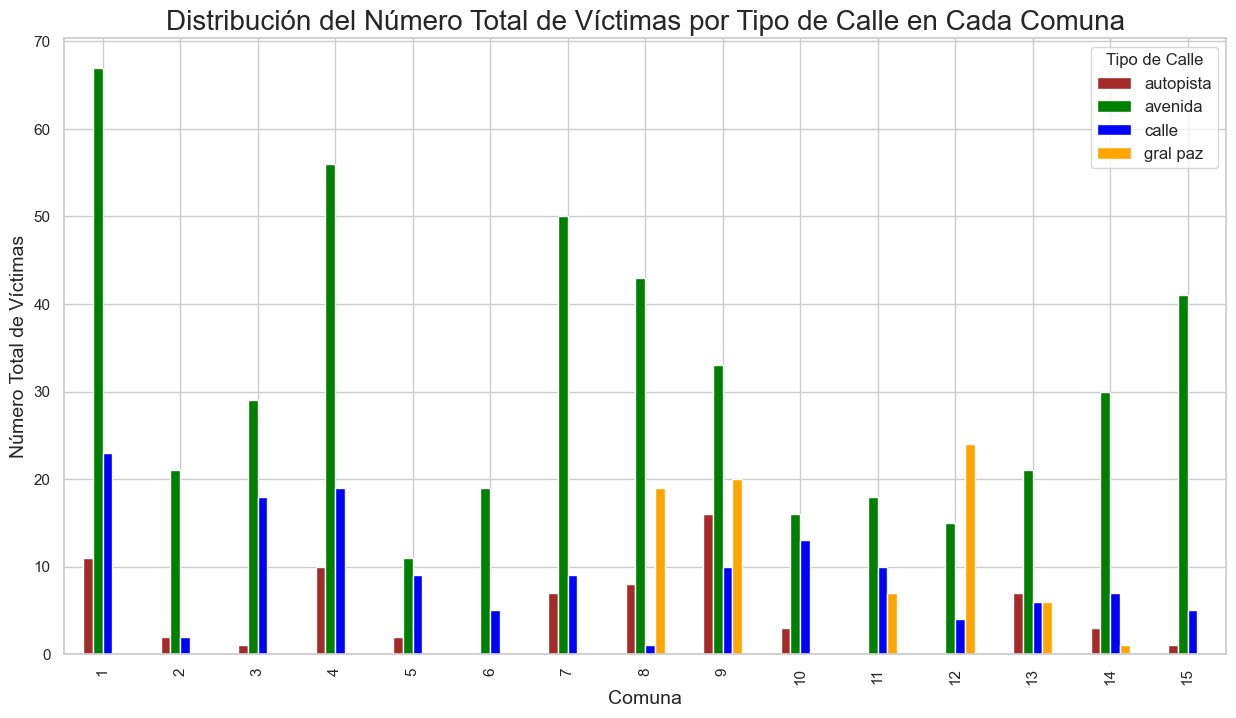

In [150]:
df_filtered = df_hhv[df_hhv['comuna'] != -1]
count_calle_comuna = df_filtered.groupby(['comuna', 'tipo_calle'])['n_victimas'].sum().unstack(fill_value=0)

sns.set(style="whitegrid")
plt.rcParams['font.size'] = 12
colors = {'avenida': 'green', 'gral paz': 'orange', 'calle': 'blue', 'autopista': 'brown'}
count_calle_comuna.plot(kind='bar', figsize=(15, 8), color=[colors[col] for col in count_calle_comuna.columns])

plt.title('Distribución del Número Total de Víctimas por Tipo de Calle en Cada Comuna', fontsize=20)
plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Número Total de Víctimas', fontsize=14)
plt.legend(title='Tipo de Calle', fontsize=12)
plt.show()

### **Conclusiones**
- Tipos de calles con mayor incidencia: Las avenidas parecen ser el tipo de calle con mayor número de víctimas en la mayoría de las comunas, lo cual podría deberse a un mayor flujo vehicular y a la alta velocidad permitida en comparación con calles comunes.

- Variaciones por comuna: Existe una variación significativa en el número de víctimas entre las diferentes comunas. Por ejemplo, la Comuna 8 tiene un alto número de víctimas en avenidas, mientras que la Comuna 9 muestra una distribución más uniforme entre avenidas y calles comunes.

- Comunas con riesgo elevado en Autopistas: Algunas comunas, como la 1 y 9, muestran un número elevado de víctimas en autopistas, lo que sugiere puntos de alto riesgo o una necesidad de mejorar las medidas de seguridad vial en dichos tramos.

## Análisis ``Homicidios`` en el tiempo

#### Evolución ``Anual`` del número de ``Víctimas`` en incidentes de tráfico

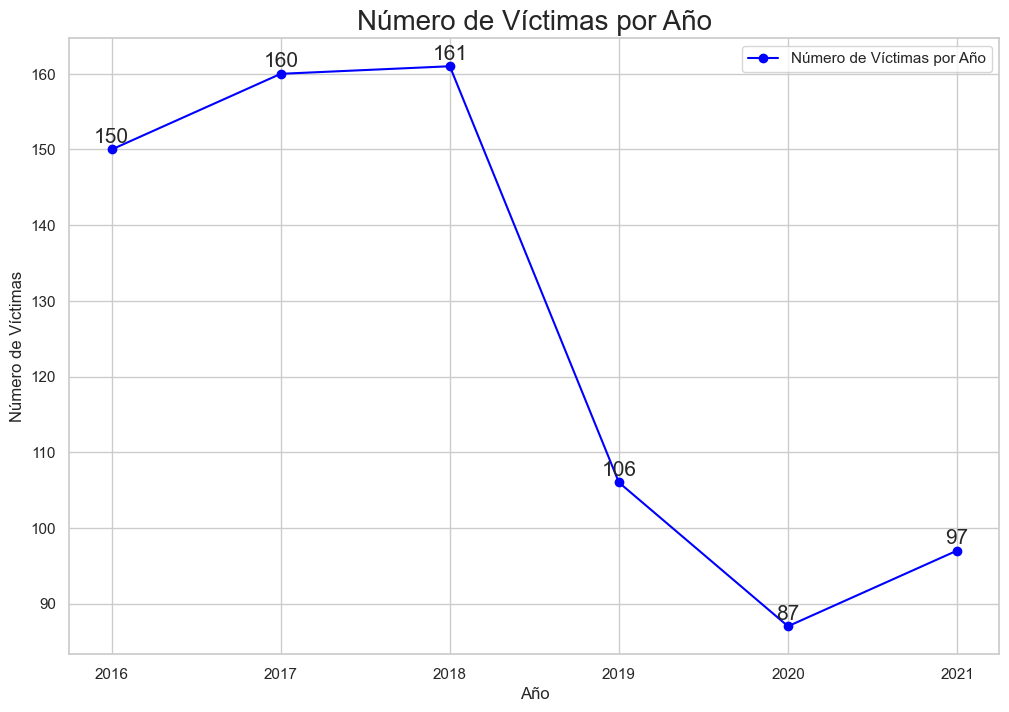

In [151]:
df_hhv['fecha'] = pd.to_datetime(df_hhv['fecha'])
grouped_data = df_hhv.groupby(df_hhv['fecha'].dt.year)['n_victimas'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(grouped_data['fecha'], grouped_data['n_victimas'], label='Número de Víctimas por Año', marker='o', color='blue')
plt.title('Número de Víctimas por Año', fontsize=20)
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.legend()

for i, txt in enumerate(grouped_data['n_victimas']):
    plt.annotate(txt, (grouped_data['fecha'][i], grouped_data['n_victimas'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=15)

plt.grid(True)
plt.show()

#### Evolución ``Mensual`` del Número de ``Víctimas`` en incidentes de tráfico

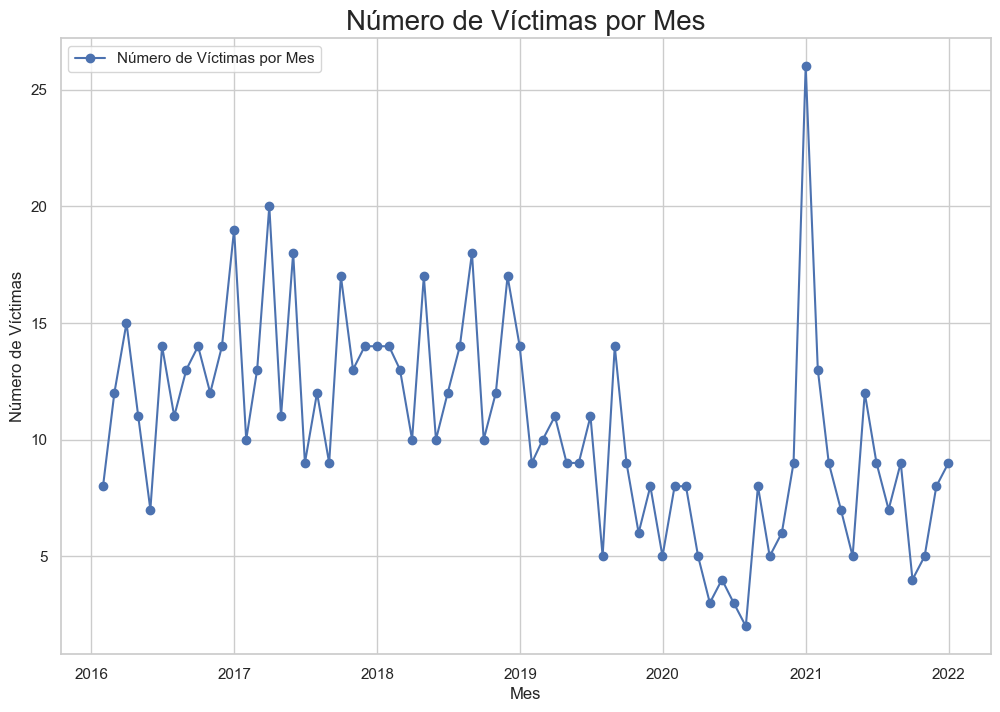

In [152]:
df_hhv['fecha'] = pd.to_datetime(df_hhv['fecha'])
grouped_data = df_hhv.resample('M', on='fecha').agg({'n_victimas': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
plt.plot(grouped_data['fecha'], grouped_data['n_victimas'], label='Número de Víctimas por Mes', marker='o')
plt.title('Número de Víctimas por Mes', fontsize=20)
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.legend()
plt.grid(True)
plt.show()

### **Conclusiones**
- Tendencia general: Hubo un descenso notable en el número de víctimas desde 2018 hasta 2020, seguido de un ligero aumento en 2021. Esta tendencia podría deberse a diversas razones, como cambios en la infraestructura vial, políticas de tráfico o incluso eventos externos como la pandemia de COVID-19.

- Impacto de eventos específicos: La marcada disminución de víctimas en 2020 podría estar relacionada con las restricciones de movilidad impuestas por la pandemia de COVID-19, lo que habría resultado en menos vehículos en las calles y, por ende, menos accidentes.

- Evaluación de políticas públicas: Si las medidas de seguridad vial se fortalecieron o se implementaron nuevas políticas entre 2018 y 2020, el gráfico podría sugerir que estas fueron efectivas en la reducción del número de víctimas. Sería importante analizar la correlación entre las intervenciones realizadas y la disminución observada.

- Necesidad de mantener esfuerzos: El aumento en el número de víctimas en 2021 indica que es importante mantener y posiblemente fortalecer las iniciativas de seguridad vial para evitar un repunte en los accidentes.

#### Análisis ``Temporal`` de Incidentes de Tráfico

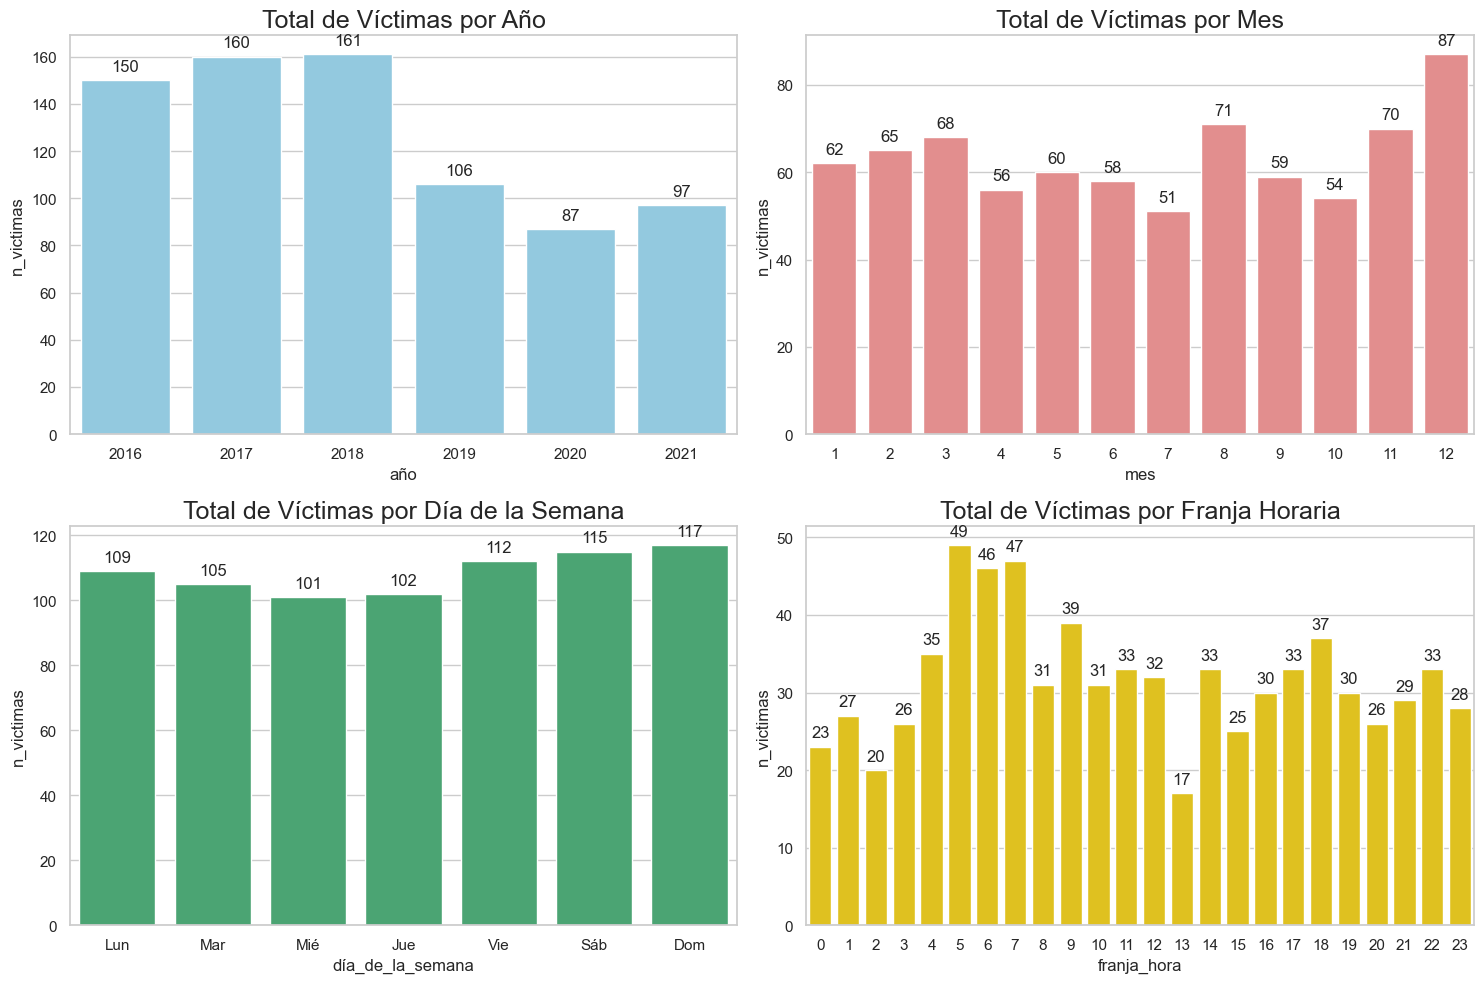

In [153]:
df_hhv['fecha'] = pd.to_datetime(df_hhv['fecha'])
df_hhv['año'] = df_hhv['fecha'].dt.year
df_hhv['mes'] = df_hhv['fecha'].dt.month
df_hhv['día_de_la_semana'] = df_hhv['fecha'].dt.day_name()

victimas_por_año = df_hhv.groupby('año')['n_victimas'].sum().reset_index()
victimas_por_mes = df_hhv.groupby('mes')['n_victimas'].sum().reset_index()
victimas_por_día_de_la_semana = df_hhv.groupby('día_de_la_semana')['n_victimas'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
victimas_por_franja_hora = df_hhv.groupby('franja_hora')['n_victimas'].sum().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='año', y='n_victimas', data=victimas_por_año, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Total de Víctimas por Año', fontsize=18)
for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='mes', y='n_victimas', data=victimas_por_mes, ax=axs[0, 1], color='lightcoral')
axs[0, 1].set_title('Total de Víctimas por Mes', fontsize=18)
for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='día_de_la_semana', y='n_victimas', data=victimas_por_día_de_la_semana, ax=axs[1, 0], color='mediumseagreen')
axs[1, 0].set_title('Total de Víctimas por Día de la Semana', fontsize=18)
axs[1, 0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
for p in axs[1, 0].patches:
    axs[1, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='franja_hora', y='n_victimas', data=victimas_por_franja_hora, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Total de Víctimas por Franja Horaria', fontsize=18)
for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### **Conclusiones**
- Víctimas por año:
Se observa una disminución general en el número de víctimas desde 2018, con un ligero aumento en 2021.
Esta tendencia refleja posiblemente el impacto de políticas de tránsito y eventos globales, como la pandemia, que han afectado el número de incidentes.

- Víctimas por mes:
Hay una variación en el número de víctimas a lo largo del año, con picos que podrían correlacionarse con factores estacionales, eventos específicos o variaciones en el flujo vehicular.

- Víctimas por día de la semana:
Los fines de semana (sábado y domingo) presentan un número mayor de víctimas, lo que puede estar asociado a un incremento en las actividades recreativas y la movilidad nocturna.

- Víctimas por franja horaria:
Las horas con mayor cantidad de víctimas coinciden con los momentos de mayor actividad en la ciudad, como son las horas pico de la mañana (5, 6 y 7 AM) y las de la tarde (de 15 a 18 horas). Esto podría sugerir una correlación entre el aumento del tráfico y la incidencia de accidentes. Necesario optar por medidas de mitigación que puedan ser implementadas en estos horarios específicos para reducir la cantidad de víctimas. Además, al observar la concentración de incidentes durante las horas pico, las autoridades podrían considerar refuerzos en la seguridad vial o campañas de concienciación en esos horarios críticos.

## Análisis por variables restantes

#### Gráficos de ``Distribución`` para ``Roles``, ``Acusados``, ``Vehículos de Víctimas`` y ``Tipos de Calle``

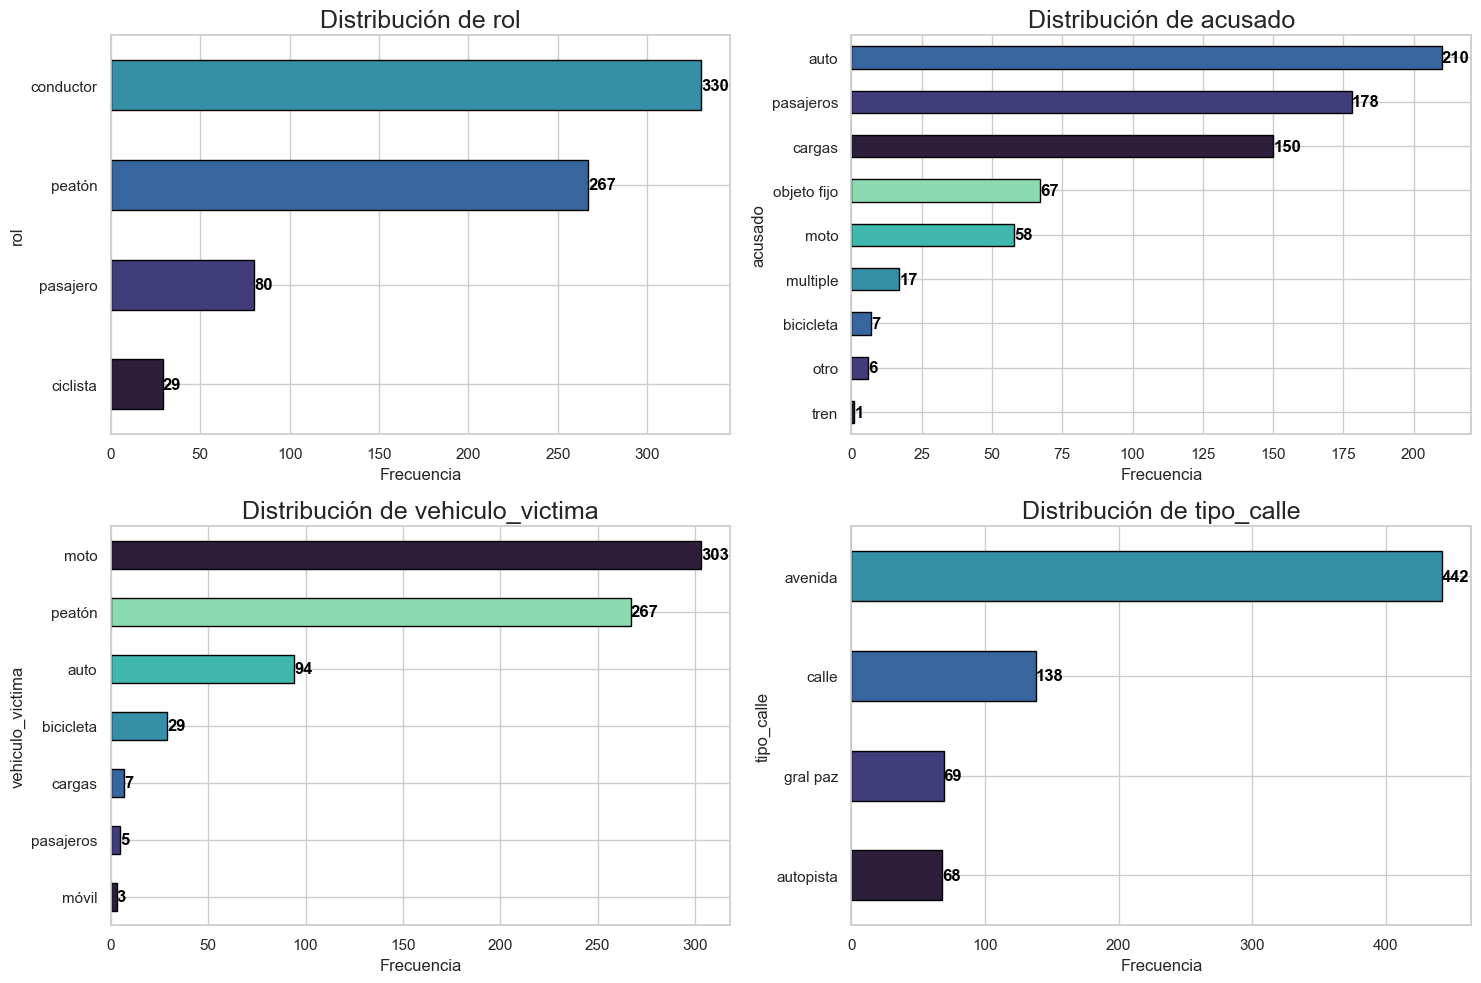

In [154]:
columnas2 = ["rol", "acusado", "vehiculo_victima", 'tipo_calle']

sns.set(style="whitegrid", palette='mako')
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for col, ax in zip(columnas2, axes.flatten()):
    frecuencias = df_hhv[col].value_counts()
    frecuencias.sort_values().plot(kind='barh', color=sns.color_palette('mako'), edgecolor='black', ax=ax)
    ax.set_title("Distribución de " + str(col), fontsize=18)
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel(str(col))

    for i, v in enumerate(frecuencias.sort_values()):
        ax.text(v + 0.1, i, str(v), va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

### **Conclusiones**
- Los conductores son el grupo más frecuentemente implicado en accidentes, seguido por los peatones, lo que resalta la importancia de medidas de seguridad tanto para los que manejan como para los que caminan por la ciudad.

- En cuanto a los acusados, los vehículos tipo auto y pasajeros lideran la lista, sugiriendo que los accidentes comúnmente involucran a automóviles privados y al transporte público.

- La mayoría de las víctimas están asociadas a motos y peatones, lo que puede indicar una vulnerabilidad mayor de estos grupos en el tráfico urbano.

- Las avenidas son, con diferencia, el tipo de calle con más accidentes registrados, seguido de calles y luego de la gral paz y autopistas, lo cual podría reflejar una mayor complejidad o un volumen más alto de tráfico en estos tipos de vías.

## Análisis por `sexo` de la **víctima**

#### Relación entre ``Edad`` de las ``Víctimas``, ``Franja Horaria`` del ``Siniestro`` y ``Género`` de las Víctimas

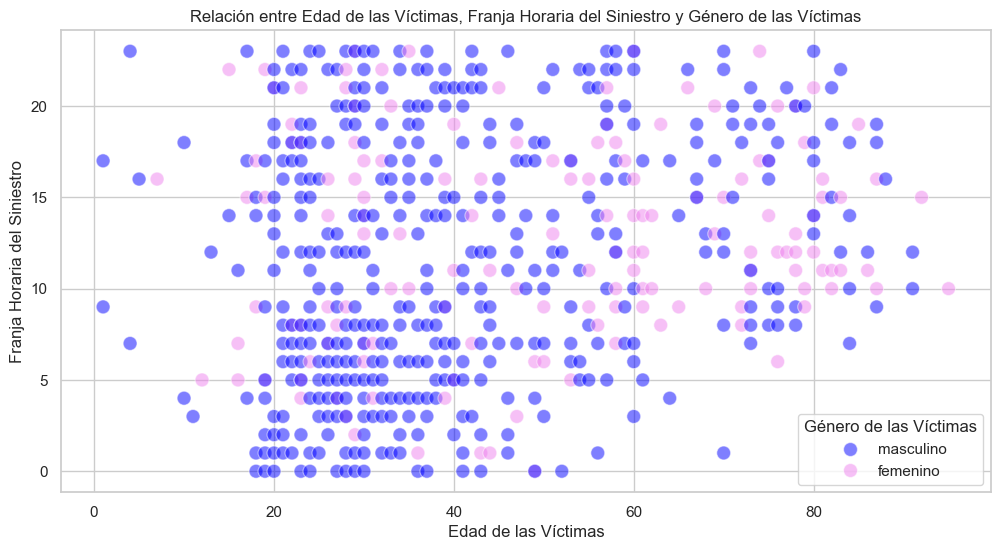

In [158]:
data = df_hhv.groupby(['edad_victima', "franja_hora", "sexo_victima"])['n_victimas'].sum().reset_index()
data["edad_victima"] = data["edad_victima"].astype("Int64")
data["franja_hora"] = data["franja_hora"].astype("Int64")

colors = {'masculino': 'blue', 'femenino': 'violet'}

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='edad_victima', y='franja_hora', hue='sexo_victima', palette=colors, alpha=0.5, s=100)

plt.xlabel('Edad de las Víctimas')
plt.ylabel('Franja Horaria del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Franja Horaria del Siniestro y Género de las Víctimas')
plt.legend(title='Género de las Víctimas')
plt.show()

### **Conclusiones**
- Predominancia de víctimas masculinas: Se observa una mayor cantidad de puntos azules en comparación con los violetas, lo que indica que los hombres son más a menudo víctimas de siniestros en todas las franjas horarias y grupos de edad.

- Concentración de siniestros en jóvenes adultos: Hay una alta densidad de puntos, especialmente azules, en el rango de edad de 20 a 40 años, lo que sugiere que los jóvenes adultos están más involucrados en siniestros. Además, se nota una disminución progresiva en la cantidad de víctimas a medida que aumenta la edad.

- Horarios de mayor riesgo: Los puntos están distribuidos de manera más densa durante las primeras horas de la mañana (alrededor de las 5-8 am) y luego desde el medio día hasta la tarde (aproximadamente de 3-6 pm). Esto podría indicar patrones de mayor riesgo asociados con horarios de tráfico intenso, como las horas pico durante la jornada laboral.

#### Distribución del Número ``Total de Víctimas`` según el ``Género``

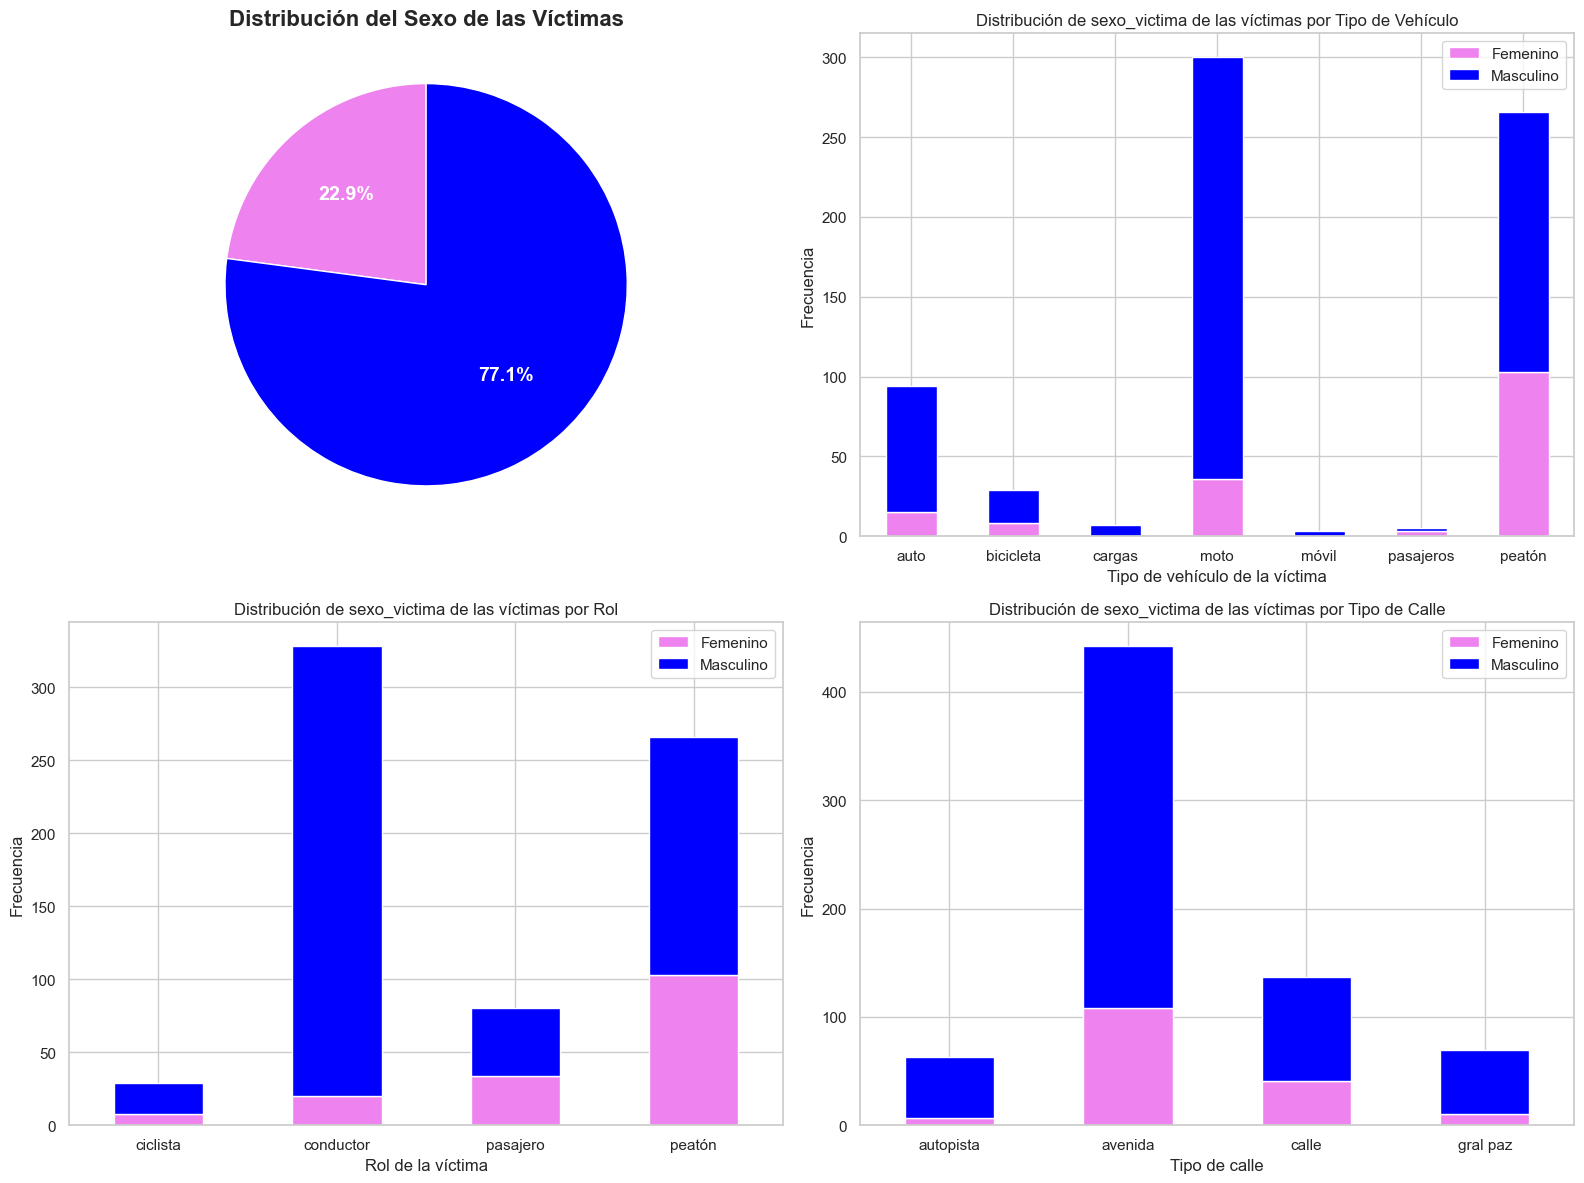

In [199]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Cuarto gráfico: Gráfico de pastel para la distribución total de sexo
count_sex = df_hhv.groupby('sexo_victima')['n_victimas'].sum()
ax4 = axs[0, 0]
ax4.pie(count_sex, labels=count_sex.index, autopct='%1.1f%%', startangle=90, colors=['violet', 'blue'], textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'white'})
ax4.set_title('Distribución del Sexo de las Víctimas', fontsize=16, fontweight='bold')

# Primer gráfico: Distribución de sexo_victima por Tipo de Vehículo
tabla_contingencia_vehiculo = pd.crosstab(df_hhv['vehiculo_victima'], df_hhv['sexo_victima'])
ax1 = tabla_contingencia_vehiculo.plot(kind='bar', stacked=True, color=["violet", 'blue'], ax=axs[0, 1])
ax1.set_title('Distribución de sexo_victima de las víctimas por Tipo de Vehículo')
ax1.set_xlabel('Tipo de vehículo de la víctima')
ax1.set_ylabel('Frecuencia')
ax1.legend(['Femenino', 'Masculino'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Segundo gráfico: Distribución de sexo_victima por Rol
tabla_contingencia_rol = pd.crosstab(df_hhv['rol'], df_hhv['sexo_victima'])
ax2 = tabla_contingencia_rol.plot(kind='bar', stacked=True, color=["violet", 'blue'], ax=axs[1, 0])
ax2.set_title('Distribución de sexo_victima de las víctimas por Rol')
ax2.set_xlabel('Rol de la víctima')
ax2.set_ylabel('Frecuencia')
ax2.legend(['Femenino', 'Masculino'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Tercer gráfico: Distribución de sexo_victima por Tipo de Calle
tabla_contingencia_calle = pd.crosstab(df_hhv['tipo_calle'], df_hhv['sexo_victima'])
ax3 = tabla_contingencia_calle.plot(kind='bar', stacked=True, color=["violet", 'blue'], ax=axs[1, 1])
ax3.set_title('Distribución de sexo_victima de las víctimas por Tipo de Calle')
ax3.set_xlabel('Tipo de calle')
ax3.set_ylabel('Frecuencia')
ax3.legend(['Femenino', 'Masculino'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### **Conclusiones**
- Desproporción en la incidencia por género: Los hombres están involucrados en un número significativamente mayor de accidentes en comparación con las mujeres, lo que sugiere que podrían beneficiarse más de campañas de prevención y educación vial.

- Riesgos por tipo de participante: Los conductores y peatones constituyen las categorías más afectadas, lo cual enfatiza la necesidad de estrategias de seguridad diferenciadas que aborden tanto la conducción segura como el tránsito peatonal protegido.

- Distribución de accidentes por tipo de calle: Las avenidas son el escenario más común de accidentes, lo que puede estar relacionado con la velocidad más alta permitida y el volumen de tráfico. Estrategias como la mejora de señalización y la implementación de cámaras de velocidad podrían ser medidas efectivas en estas zonas.

- Víctimas de accidentes por rol de la víctima: El alto número de peatones involucrados en accidentes resalta la importancia de mejorar las infraestructuras peatonales, como cruces seguros y mayor visibilidad en zonas de alto tráfico.